In [3]:
import pandas as pd
import numpy as np

### LOAD DATA, DICTIONARY, COHERNECE SCORES, LISTS

In [4]:
df_1 = pd.read_csv('data/articles1.csv')
df_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [5]:
import pickle 

with open("lists/bow_corpus.txt", "rb") as fp:   # Unpickling
    bow_corpus = pickle.load(fp)
    
with open("lists/norm_corpus_bigrams.txt", "rb") as fp:   # Unpickling
    norm_corpus_bigrams = pickle.load(fp)
    
with open("lists/norm_papers.txt", "rb") as fp:   # Unpickling
    norm_papers = pickle.load(fp)
    
with open("lists/pre_papers.txt", "rb") as fp:   # Unpickling
    pre_papers = pickle.load(fp)
    
with open("lists/pre_titles.txt", "rb") as fp:   # Unpickling
    pre_titles = pickle.load(fp)

In [6]:
import nltk
import gensim

dictionary = gensim.corpora.Dictionary.load('models/dictionary.gensim')
coherence_df = pd.read_csv('models/gensim_scores/coherence_df.csv')

with open("models/gensim_scores/coherence_scores.txt", "rb") as fp:   # Unpickling
    coherence_scores = pickle.load(fp)


### Visualizing coherence scores of LDA models

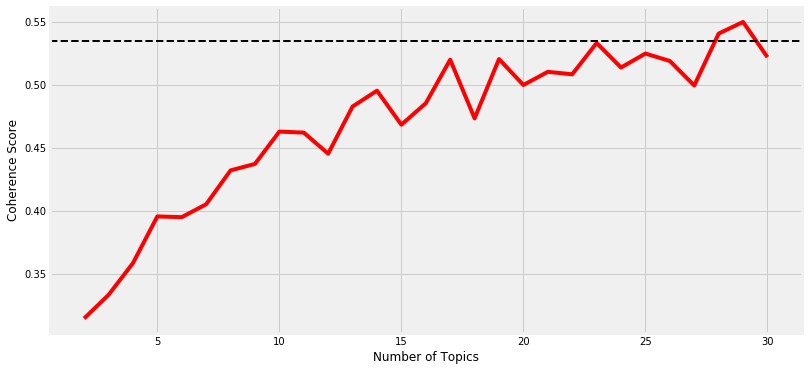

In [7]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.535, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

### SELECTING LDA MODEL BASED ON COHERENCE

In [8]:
TOPICS = 25

load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_'+str(TOPICS)+'.gensim')

### EVALUATING TOPICS

In [9]:
topics = [[(term, round(wt, 3))
               for term, wt in load_lda_model.show_topic(n, topn=20)]
                   for n in range(0, load_lda_model.num_topics)]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, load_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history"
Topic2,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama"
Topic3,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american"
Topic4,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement"
Topic5,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology"
Topic6,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day"
Topic7,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site"
Topic8,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack"
Topic9,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passenger, driver, road"
Topic10,"game, team, first, player, sport, win, season, two, year, final, second, play, time, world, three, fan, point, football, ball, back"


### INTERPRETING RESULTS

In [10]:
tm_results = load_lda_model[bow_corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(13, 0.29705825),
 (19, 0.39641243),
 (21, 0.4018446),
 (21, 0.20493829),
 (12, 0.68709695)]

In [11]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

# change these into values from pre_df

corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

### DISTRIBUTION OF TOPICS

In [12]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,7471,14.96,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history"
1,2,2149,4.30,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama"
2,3,61,0.12,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american"
3,4,3507,7.02,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement"
4,5,2269,4.54,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology"
5,6,4699,9.41,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day"
6,7,1131,2.27,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site"
7,8,476,0.95,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack"
8,9,1263,2.53,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passenger, driver, road"
9,10,1708,3.42,"game, team, first, player, sport, win, season, two, year, final, second, play, time, world, three, fan, point, football, ball, back"


### DOCUMENTS RELATED TO GIVEN TOPIC

In [16]:
corpus_topic_df[corpus_topic_df['Dominant Topic'] == 13].sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
42361,42361,13,81.53,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship",China: South China Sea island building ’almost complete’,"hong kong (cnn) china’s foreign ministry says it will soon complete controversial land reclamation on some islands and reefs in disputed waters in the south china sea. however, the ministry also ..."
33122,33122,13,81.15,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship",North Korea fires four ballistic missiles,"(cnn) north korea fired four ballistic missiles early monday morning in what japan’s leader described as ”an extremely dangerous action.” a fifth missile failed to launch, a us official told cnn...."
6094,6094,13,80.71,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","New Test of North Korean Missile Fails, South Says - The New York Times","seoul, south korea — north korea launched an ballistic missile, but the test failed as the projectile exploded shortly after liftoff, the south korean military said on sunday. the north’s m..."
43877,43877,13,80.45,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship",North Korea fires unidentified projectile from near missile base,"’ ’ ” seoul (reuters) north korea fired an unidentified projectile from its region, where a missile base is located, south korea’s military said on monday, a possible retaliation by t..."
38433,38433,13,79.98,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","North Korean missile launch fails, US says","(cnn) us strategic command systems detected a failed north korean ballistic missile launch saturday evening near the northwestern city of kusong, the pentagon said. ”we strongly condemn this and ..."
...,...,...,...,...,...,...
1281,1281,13,11.81,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Australia, Libya, North Korea: Your Morning Briefing - The New York Times","good morning. here’s what you need to know: • the trump administration detailed plans to deport millions of immigrants, releasing expansive new rules that allow rapid deportations and the expulsi..."
1480,1480,13,11.11,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Kim Jong-nam, Jeff Sessions, Snapchat: Your Morning Briefing - The New York Times",good morning. here’s what you need to know: • the trump administration faced new turmoil over new disclosures of contacts top aides had with russian officials during the presidential campaign or ...
4665,4665,13,10.47,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Donald Trump, Japan, Mosul: Your Wednesday Briefing - The New York Times","good morning. here’s what you need to know: • after a morning of statements and twitter posts, donald j. trump met with times journalists and our publisher at our midtown headquarters. we ..."
1168,1168,13,9.47,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Sa

### DOCUMENT'S WITH HIGHEST TOPIC CONSTRIBUTION

In [13]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
35294,35294,4,95.46,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement","Blumenthal: If Sessions had 3rd, undisclosed Russian meeting, ’could be perjury’","washington (cnn) sen. richard blumenthal said thursday that if attorney general jeff sessions did have a third, undisclosed meeting with russia’s ambassador to the united states, it ”could be perj..."
167,167,23,92.70,"film, show, movie, star, actor, character, eu, hollywood, series, best, season, tv, award, episode, role, producer, director, television, audience, netflix",Golden Globe Award Winners 2017: The Complete List - The New York Times,"here are the movies and tv shows that received the top awards. best picture, drama: “moonlight” best picture, comedy or musical: “la la land” actress, drama: isabelle huppert, “elle” actor, drama:..."
30042,30042,4,92.09,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement",Report: Concerned State Dept Employees Told to ’Never Speak of’ Hillary’s Server - Breitbart,"two it department employees of hillary clinton’s state department were told not to talk about her private email server when both workers noticed it and raised concerns, according to an official of..."
29972,29972,24,91.98,"republican, state, vote, democrat, party, voter, election, would, candidate, cruz, support, poll, senate, bill, gop, conservative, house, sander, democratic, rubio",Ted Cruz Dominates Wyoming Caucus - Breitbart,"on saturday, wyoming republicans voted in county caucuses to elect delegates to the republican convention. texas sen. ted cruz dominated the vote, winning 66 percent support. [florida sen. marco r..."
30205,30205,4,91.94,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement",FBI Reopening Investigation into Hillary Clinton’s Private E-mail Server - Breitbart,"the federal bureau of investigations will reopen the investigation into hillary clinton’s use of a private email server exclusively during her time as secretary of state. in a letter to congress,..."
...,...,...,...,...,...,...
4399,4399,2,10.25,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama","Duterte, Mosul, Calais Jungle: Your Thursday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
1063,1063,15,9.78,"say, people, like, get, think, going, know, would, thing, want, time, way, go, really, see, lot, make, back, could, look","Donald Trump, North Korea, Kashmir: Your Morning Briefing - The New York Times",good morning. here’s what you need to know: • president trump’s foreign policy was tested over a weekend of golf diplomacy with prime minister shinzo abe of japan when north korea launched a ball...
1168,1168,13,9.47,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Samsung, Kim Jong-un, Rex Tillerson: Your Morning Briefing - The New York Times","good morning. here’s what you need to know: • a south korean court announced the arrest of the de facto leader of samsung, lee on bribery accusations connected to the corruption scandal that ha..."
4952,4952,13,8.98,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, unit

### DOMINENT TOPICS IN SPECIFIC DOCUMENTS

In [14]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17,
                        906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
9,9,19,36.17,"family, child, life, father, mother, home, son, told, parent, day, church, friend, death, daughter, girl, died, two, wife, boy, brother",Calling on Angels While Enduring the Trials of Job - The New York Times,"angels are everywhere in the muñiz family’s apartment in the bronx: paintings of angels on the wall, ceramic angels flanking the ancient vcr, angels strumming lyres or blowing little golden trumpe..."
13,13,15,48.37,"say, people, like, get, think, going, know, would, thing, want, time, way, go, really, see, lot, make, back, could, look",How to form healthy habits in your 20s - The New York Times,this article is part of a series aimed at helping you navigate life’s opportunities and challenges. what else should we write about? contact us: smarterliving@nytimes. com. when you woke up this m...
17,17,14,27.69,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program","Modi’s Cash Ban Brings Pain, but Corruption-Weary India Grits Its Teeth - The New York Times","mumbai, india — it was a bold and risky gamble by prime minister narendra modi of india that quickly seemed to backfire. the announcement of a ban on the largest currency bills circulating in i..."
392,392,14,31.82,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program","By Announcing New Jobs, Corporations Help Themselves Too - The New York Times","donald j. trump won’t be sworn in until friday but big business has already thrown him a veritable inaugural ball. a series of companies, among them ford, lockheed martin, amazon and sprint, hav..."
503,503,24,38.37,"republican, state, vote, democrat, party, voter, election, would, candidate, cruz, support, poll, senate, bill, gop, conservative, house, sander, democratic, rubio",G.O.P. Senators Hope to Speed Trump Cabinet Confirmations - The New York Times,"washington — senate republicans will move this week to speed the confirmation of president trump’s cabinet, an effort that has been stymied by the combination of lax preparation by mr. trump’s ..."
681,681,14,18.94,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program",Duterte’s Free Birth-Control Order Is Latest Skirmish With Catholic Church - The New York Times,"manila — when lizel torreras, 35, became pregnant with her third child, she mixed a tincture of bitter herbs and mahogany bark, a home remedy said to induce abortion. her husband, who worked as..."
733,733,1,25.61,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history",Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times,"paris — france chose an idealistic, traditional candidate in sunday’s primary to represent the socialist and parties in the presidential election this spring. the candidate, benoît hamon, 4..."
906,906,2,30.81,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama",Cyprus Fears Russian Meddling in Its Settlement Talks - The New York Times,"nicosia, cyprus — as the united nations geared up for negotiations that it declared the “best and last chance” to unite cyprus after more than four decades of acrimonious division, russia’s amb..."
996,996,7,24.80,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site",Mother Jones Is Named Magazine of the Year - The New York Times,"mother jones was named magazine of the year on tuesday for finding “new ways to engage audiences and continue its practice of fearless journalism,” the s

### RELEVANT DOCUMENTS PER TOPIC BASED ON CONTRIBUTION

In [15]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,43831,1,81.62,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history",We visited convenience store rivals Wawa and Sheetz to see who does it best — and the winner is clear,"’the capulets versus the montagues. ’ ’harvard versus yale.’ ’britney versus christina.’ ”among history’s fabled rivalries, perhaps none is more fiercely contested than wawa versus sheetz.”"
2,154,2,85.00,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama",Airstrikes by Russia Buttress Turkey in Battle vs. ISIS - The New York Times,"washington — russian warplanes have carried out airstrikes to support turkey’s offensive in northern syria against the islamic state, an important evolution in a budding partnership. the deep..."
3,49376,3,43.01,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american",Justin Trudeau walks back his comments on Fidel Castro after getting slammed for praising the dictator,’ ’ ’ canadian prime minister justin trudeau clarified his comments on the death of cuban president fidel castro after being harshly criticized for them. ’ ’ trudeau said at a news confer...
4,35294,4,95.46,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement","Blumenthal: If Sessions had 3rd, undisclosed Russian meeting, ’could be perjury’","washington (cnn) sen. richard blumenthal said thursday that if attorney general jeff sessions did have a third, undisclosed meeting with russia’s ambassador to the united states, it ”could be perj..."
5,46714,5,84.78,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology","Yahoo CEO Marissa Mayer got a $6 million pay cut last year, but still got $36 million","’’ ”yahoo ceo marissa mayer’s total compensation was worth $36 million last year, down $6 million, or 15% from the year before, according .” ”most of the cuts came from her option awards, which we..."
6,43799,6,74.98,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day",Bernie Sanders taunts Trump with photos of inauguration crowd after Trump says a rally of his voters would be the ’biggest’,’ sen. bernie sanders responded to president donald trump’’s claim that a rally with his voters would be the ”biggest ever” with photos of his inauguration crowd. ’ ’ trump suggesting tha...
7,18868,7,63.56,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site",WATCH: Why Congress Must Censure Obama for His Hiroshima Speech - Breitbart,"the latest video from breitbart news regarding obama’s apology tour in japan.[ for more on this topic, read this article by joel pollak. for more videos from breitbart news, visit our facebook po..."
8,944,8,60.45,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack",Our Articles on the Attacks Trump Says the Media Didn’t Cover - The New York Times,"the white house has issued a list of 78 terrorist attacks, saying most were underreported. the trump administration, under fire for immigration restrictions and other policies it says are designed..."
9,44647,9,76.85,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passen

### VISUALIZING MODEL TOPICS WITH pyLDAvis

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data. 

In [22]:
import pyLDAvis.gensim

load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_25.gensim')

lda_display = pyLDAvis.gensim.prepare(load_lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
